In [48]:
FEATURES_LIMIT=5
DATA_PATH="C:\\Users\\nhnha\\OneDrive\\Desktop\\Whisker paper\\Living-machine2023\\strain_data\\test_data_02_28\\forward\\P = 0\\No normalized"


In [78]:
import os
import glob
import numpy as np 
import pandas as pd 

all_data = {'odd': {'labels': [], 'values': [], 'file_name': []},
            'even': {'labels': [], 'values': [], 'file_name': []}}
for file_name in glob.glob(f"{DATA_PATH}/*.csv"):
    # check odd or even in file name
    idx = int(file_name[:-4].split("_")[-1])
    if idx % 2 == 1:
        data_storage = all_data['odd']
    else:
        data_storage = all_data['even']

    data_storage['file_name'].append(file_name)

    # load data to get label
    label = file_name.split("\\")[-1][1:-4]
    data_storage['labels'].append(label)

    # load real values
    df = pd.read_csv(open(file_name), header=0)

    def filter_fn(row):
        return row

    df = df.apply(filter_fn, axis=1)
    values = df[df.columns[0]].tolist()
    data_storage['values'].append(np.array(values[:FEATURES_LIMIT]))


{'odd': {'labels': ['40_a_01',
   '40_a_03',
   '40_a_05',
   '40_a_07',
   '40_a_09',
   '40_a_11',
   '40_a_13',
   '40_a_15',
   '40_a_17',
   '40_a_19',
   '40_b_01',
   '40_b_03',
   '40_b_05',
   '40_b_07',
   '40_b_09',
   '40_b_11',
   '40_b_13',
   '40_b_15',
   '40_b_17',
   '40_b_19',
   '40_c_01',
   '40_c_03',
   '40_c_05',
   '40_c_07',
   '40_c_09',
   '40_c_11',
   '40_c_13',
   '40_c_15',
   '40_c_17',
   '40_c_19',
   '60_a_01',
   '60_a_03',
   '60_a_05',
   '60_a_07',
   '60_a_09',
   '60_a_11',
   '60_a_13',
   '60_a_15',
   '60_a_17',
   '60_a_19',
   '60_b_01',
   '60_b_03',
   '60_b_05',
   '60_b_07',
   '60_b_09',
   '60_b_11',
   '60_b_13',
   '60_b_15',
   '60_b_17',
   '60_b_19',
   '60_c_01',
   '60_c_03',
   '60_c_05',
   '60_c_07',
   '60_c_09',
   '60_c_11',
   '60_c_13',
   '60_c_15',
   '60_c_17',
   '60_c_19',
   '80_a_01',
   '80_a_03',
   '80_a_05',
   '80_a_07',
   '80_a_09',
   '80_a_11',
   '80_a_13',
   '80_a_15',
   '80_a_17',
   '80_a_19',
   

In [81]:
all_data['odd']['values']

[array([117.37142857, 114.79571429, 114.53857143, 116.81      ,
        101.80857143]),
 array([115.89142857, 114.27285714, 117.05428571, 118.17285714,
        114.57285714]),
 array([120.58857143, 121.29857143, 120.79428571, 116.82571429,
        115.54285714]),
 array([114.95142857, 115.84142857, 116.22857143, 117.20571429,
        117.50571429]),
 array([114.99285714, 116.31285714, 116.80714286, 117.66571429,
        116.15857143]),
 array([113.81571429, 115.96857143, 117.12428571, 116.34714286,
        113.90142857]),
 array([117.82      , 113.78428571, 113.3       , 115.44      ,
        116.64428571]),
 array([113.59714286, 112.56714286, 114.79142857, 116.95428571,
        116.00571429]),
 array([117.47714286, 115.97428571, 113.93714286, 114.35428571,
        115.02      ]),
 array([117.40571429, 113.22428571, 112.55428571, 114.88857143,
        117.03857143]),
 array([135.43571429, 134.96428571, 135.88428571, 135.97857143,
        137.43      ]),
 array([137.77142857, 137.637142

In [50]:
print("Object labels:")
all_data['odd']['labels']

Object labels:


['40_a_01',
 '40_a_03',
 '40_a_05',
 '40_a_07',
 '40_a_09',
 '40_a_11',
 '40_a_13',
 '40_a_15',
 '40_a_17',
 '40_a_19',
 '40_b_01',
 '40_b_03',
 '40_b_05',
 '40_b_07',
 '40_b_09',
 '40_b_11',
 '40_b_13',
 '40_b_15',
 '40_b_17',
 '40_b_19',
 '40_c_01',
 '40_c_03',
 '40_c_05',
 '40_c_07',
 '40_c_09',
 '40_c_11',
 '40_c_13',
 '40_c_15',
 '40_c_17',
 '40_c_19',
 '60_a_01',
 '60_a_03',
 '60_a_05',
 '60_a_07',
 '60_a_09',
 '60_a_11',
 '60_a_13',
 '60_a_15',
 '60_a_17',
 '60_a_19',
 '60_b_01',
 '60_b_03',
 '60_b_05',
 '60_b_07',
 '60_b_09',
 '60_b_11',
 '60_b_13',
 '60_b_15',
 '60_b_17',
 '60_b_19',
 '60_c_01',
 '60_c_03',
 '60_c_05',
 '60_c_07',
 '60_c_09',
 '60_c_11',
 '60_c_13',
 '60_c_15',
 '60_c_17',
 '60_c_19',
 '80_a_01',
 '80_a_03',
 '80_a_05',
 '80_a_07',
 '80_a_09',
 '80_a_11',
 '80_a_13',
 '80_a_15',
 '80_a_17',
 '80_a_19',
 '80_b_01',
 '80_b_03',
 '80_b_05',
 '80_b_07',
 '80_b_09',
 '80_b_11',
 '80_b_13',
 '80_b_15',
 '80_b_17',
 '80_b_19',
 '80_c_01',
 '80_c_03',
 '80_c_05',
 '80

[11.39859913  4.88653574 -1.86835086  4.1102726   4.01199739  6.14007963
  6.2396681   7.60502792  6.33329234  7.08330366]
[[11.39859913  9.01415256]
 [ 4.88653574 -0.72631175]
 [-1.86835086  4.80460702]
 [ 4.1102726  -2.22236191]
 [ 4.01199739 -1.09037904]
 [ 6.14007963  0.38668696]
 [ 6.2396681  -1.44874968]
 [ 7.60502792 -3.40017281]
 [ 6.33329234  1.07142366]
 [ 7.08330366 -2.09528382]]
[-17.46370474 -30.11915626 -32.90047954 -22.80657266 -33.22855398
 -32.5623204  -29.88757562 -33.58693702 -28.98171679 -30.78894608]
[[-17.46370474   0.09542353]
 [-30.11915626  -0.23571769]
 [-32.90047954  -2.22049797]
 [-22.80657266   7.6822861 ]
 [-33.22855398  -2.03819355]
 [-32.5623204   -2.81746107]
 [-29.88757562  -2.02032149]
 [-33.58693702  -2.0102757 ]
 [-28.98171679   0.58467806]
 [-30.78894608  -2.99804537]]


c:\Users\nhnha\anaconda3\envs\sofapy\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\Users\nhnha\anaconda3\envs\sofapy\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 800x600 with 0 Axes>

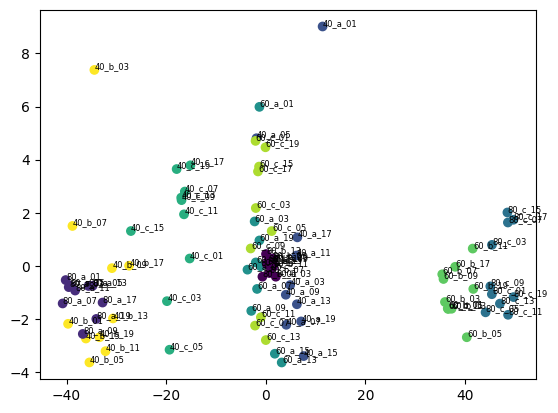

<Figure size 800x600 with 0 Axes>

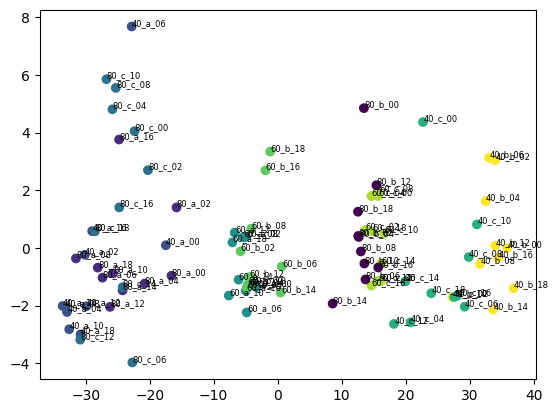

In [110]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

for type_file in ['odd', 'even']:
    # label map for coloring
    label_map = dict([
        (v, i) for i, v in enumerate(
            list(set("_".join(e.split("_")[:-1]) for e in all_data[type_file]['labels'])) # remove the last component in file name (*_00, *_01, ...)
        )])
    X, labels =  all_data[type_file]['values'], all_data[type_file]['labels']
    # print('label_map=',label_map)
    reduce_processor = PCA(n_components=2)
    # reduce_processor = TSNE(n_components=2, verbose=1, random_state=123, n_iter=6000)

    pipe = Pipeline([
                    # ('scaler', StandardScaler()),
                    ('pca', reduce_processor)])
    plt.figure(figsize=(8,6))
    Xt = pipe.fit_transform(X)
    print(Xt[0:10,0])
    print(Xt[0:10])

    plot, ax = plt.subplots()
    figure = ax.scatter(Xt[:,0], Xt[:,1], 
            # alpha=hue,
            c=[ label_map["_".join(e.split("_")[:-1])] for e in labels]
            )

    for i, txt in enumerate(labels):
        ax.text(Xt[i,0]+.04, Xt[i,1]+.04, txt, fontsize=6)
    plot.show()
    plot.savefig(f'{str(reduce_processor)[:3]}.{type_file}.pdf')

In [87]:
test = [[1,2,3,4,5],[6,7,8,9,10]]
print(test[1])

[6, 7, 8, 9, 10]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

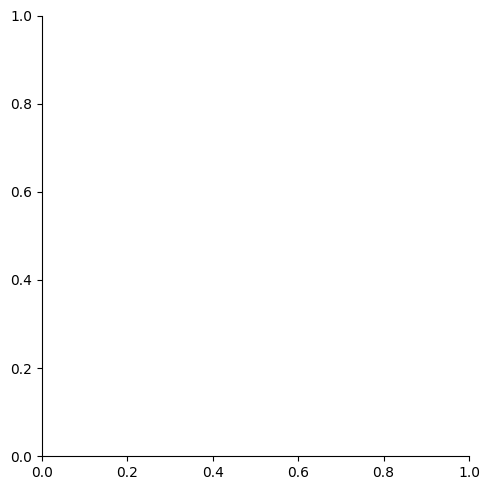

In [108]:
import seaborn as sns
sns.lmplot(data=Xt)